In [1]:
import os
os.getcwd()
os.chdir('C:\\Users\\91999\downloads')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

In [3]:
ad_click = pd.read_csv("Social_Network_Ads.csv")

In [4]:
ad_click.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
ad_click.shape

(400, 5)

In [6]:
# checking for NaN values.
ad_click.isna().sum()
# No null values

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
ad_click.duplicated().sum()
#There is no duplicated values in the dataset

0

In [8]:
ad_click.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [9]:
ad_click.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [10]:
ad_click.nunique()

User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

In [11]:
ad_click.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


#### Looking at the correlation values we can say that whether the user will click on the ad or not depends on age

In [12]:
ad_click.corr()[['Purchased']].sort_values(by='Purchased', ascending = False)

,Purchased
Purchased,1.000000
Age,0.622454
EstimatedSalary,0.362083
User ID,0.007120


#### So ya purchased is highly related to age as compared to other variable. Now let's see how

# EDA

In [13]:
ad_click.Gender

0        Male
1        Male
2      Female
3      Female
4        Male
        ...  
395    Female
396      Male
397    Female
398      Male
399    Female
Name: Gender, Length: 400, dtype: object

In [14]:
ad_click.Gender.value_counts(normalize=True)

Female    0.51
Male      0.49
Name: Gender, dtype: float64

#### There are 51% females in our data

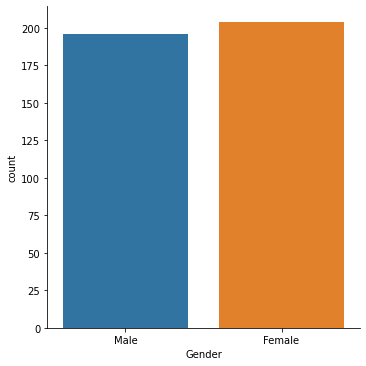

In [15]:
# count of gender
sns.catplot(x='Gender', data = ad_click, kind = 'count')

#### There is just a slight difference between female and males graph. It can be because our data has 51% females

In [16]:
ad_click.groupby('Gender')['Purchased'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,204.0,0.377451,0.485942,0.0,0.0,0.0,1.0,1.0
Male,196.0,0.336735,0.473804,0.0,0.0,0.0,1.0,1.0


<AxesSubplot:xlabel='Gender', ylabel='Purchased'>

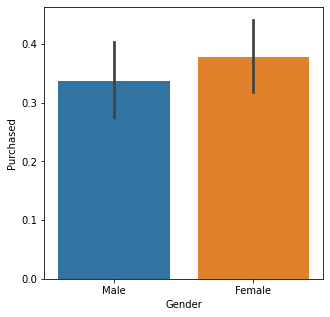

In [17]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='Gender', y = 'Purchased', data = ad_click)

#### Gender is not actually affecting the number of ad clicks. If we have more females in our dataset then we have more number of purchased from females.

In [18]:
sns.set_style('whitegrid')
data['Age'].hist(bins=30)
plt.xlabel('Age')

NameError: name 'data' is not defined

#### Majorly people clicking on gthe ads belong to 35 to 48 age category

ValueError: array length 1 does not match index length 400

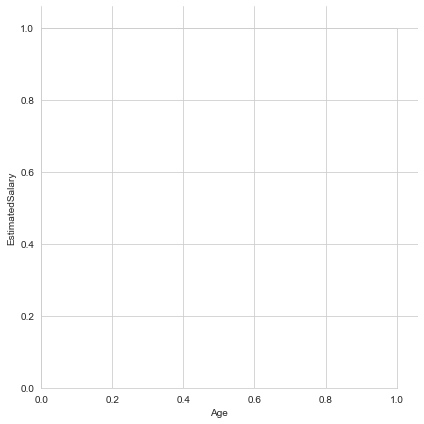

In [19]:
g = sns.JointGrid(data=ad_click, x="Age", y="EstimatedSalary", space=0, ratio=17)
g.plot_joint(sns.scatterplot, size=["EstimatedSalary"], sizes=(30, 120),
             color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)

#### After 30yrs people are getting high salary.
#### Maybe because older people have more experience

<Figure size 720x720 with 0 Axes>

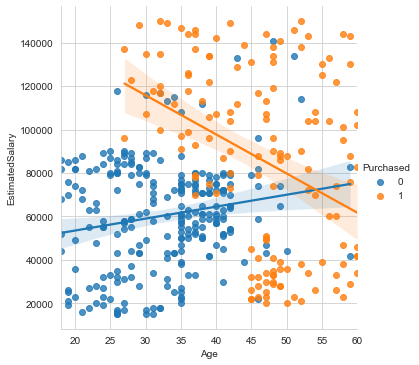

In [20]:
plt.figure(figsize=(10,10))
sns.lmplot(x='Age',y='EstimatedSalary', hue= 'Purchased', data=ad_click)

#### According to the above graph people older than 40 yrs and with high salary clicks on the ad most

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

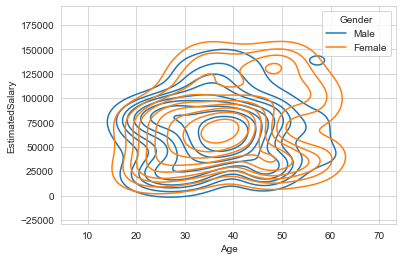

In [21]:
sns.kdeplot(
    data=ad_click,
    x="Age",
    y="EstimatedSalary",
    hue="Gender",
    thresh=.1,
)

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

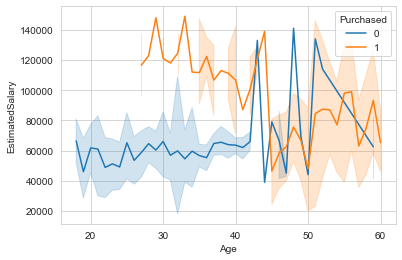

In [22]:
sns.lineplot(x="Age", y="EstimatedSalary",
             hue="Purchased",
             data=ad_click)

# Logistic Regression Modelling

In [23]:
ad_clickfinal = pd.get_dummies(data=ad_click, drop_first=True)

In [24]:
ad_clickfinal.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [25]:
ad_clickfinal.columns

Index(['User ID', 'Age', 'EstimatedSalary', 'Purchased', 'Gender_Male'], dtype='object')

### Looking at the above analysis we can say that purchase highly depend on age. So, lets do logistics with just one variable

In [58]:
X = ad_clickfinal[['Age']]
y = ad_clickfinal['Purchased']

#### the combination of all the variables were giving 0.77 accuracy. Age was the variable which gave maximum accuracy

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [42]:
clf = LogisticRegression(random_state=0)

In [43]:
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [44]:
clf.predict(X_test)

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [45]:
clf.score(X_train, y_train)

0.821875

In [46]:
clf.score(X_test, y_test)

0.9125

In [47]:
pred = clf.predict(X_test)

In [48]:
from sklearn.metrics import classification_report , confusion_matrix
print( confusion_matrix (y_test , pred))

[[50  2]
 [ 5 23]]


# Evaluation Metrices

## Confusion Matrix

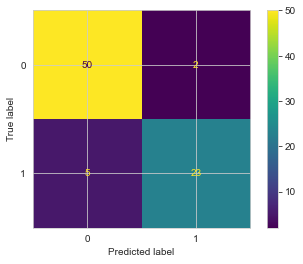

In [49]:
confusion_mat = metrics.confusion_matrix(y_test,pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels=clf.classes_)
disp.plot()

#### True Positives: When the actual class is positive and the model predicts a positive course, it is termed True Positive.

#### True Negative: When the actual class is negative, and the model predicts a negative type, it is True Negative.

#### False Positive: When the actual class is negative, and the model predicts a positive course, it is False Positive.

#### False Negative: When the actual class is positive, and the model predicts a harmful category, it is False Negative.

In [50]:
# calculating the values of confusion matrix
tn, fp, fn, tp = metrics.confusion_matrix(y_test, pred).ravel()

## Precision

In [51]:
# precision using sklearn function
Precision_using_sklearn = metrics.precision_score(y_test,pred)
print (Precision_using_sklearn)

0.92


#### Precision measures how precise or accurate the prediction of your model is. In simple terms, when the model predicts True or Yes or 1, how often is the prediction correct

## Recall

In [52]:
# recall using sklearn function
sensitivity_using_sklearn = metrics.recall_score(y_test,pred)
print (sensitivity_using_sklearn)

0.8214285714285714


#### Recall can also be defined with respect to either of the classes. Recall of positive class is also termed sensitivity and is defined as the ratio of the True Positive to the number of actual positive cases. It can intuitively be expressed as the ability of the classifier to capture all the positive cases.

## F-1 score

In [53]:
# F1 Score
F1_Score = metrics.f1_score(y_test,pred)
print (F1_Score)

0.8679245283018867


#### F1-score is considered one of the best metrics for classification models regardless of class imbalance. F1-score is the weighted average of recall and precision of the respective class. Its best value is 1 and the worst value is 0.

## Sensitivity

In [54]:
# sensitivity using the formula 
sensitivity_using_formula = (tp)/(tp+fn)
print (sensitivity_using_formula)

0.8214285714285714


#### Sensitivity measures how sensitive your model is. The model can correctly classify positive values. In simple terms, when the actual class is True or 1 or yes, how often does the model predict True or 1 or yes.

## Specificity

In [55]:
# specificity using formula
Specificity_using_formula = (tn) / (tn+fp)
print (Specificity_using_formula)

0.9615384615384616


#### Specificity measures how specific our model is. If the model predicts all healthy individuals as not having a particular disease, the model is said to be highly specific.

## Misclassification Rate

In [56]:
# error rate using sklearn accuracy score
error_rate_using_sklearn = 1-metrics.accuracy_score(y_test,pred)
print (error_rate_using_sklearn)

0.08750000000000002


####  Misclassification rate is the exact opposite of Accuracy. It measures how inaccurate your model is. 

## ROC, AUROC

Text(0.5, 0, 'False positive rate')

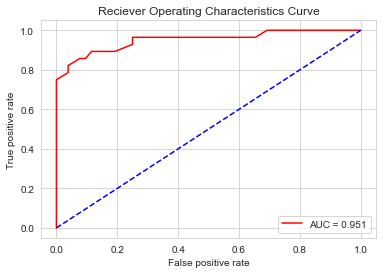

In [57]:
# plotting the ROC curve
frp,trp, threshold = roc_curve(y_test,clf.predict_proba(X_test)[:,1])
roc_auc_ = auc(frp,trp)
plt.title('Reciever Operating Characteristics Curve')
plt.plot(frp,trp,'r',label = 'AUC = %0.3f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

#### ROC Curve stands for Receiver Operating Characteristic Curve. The curve checks how the observations change classes based on the variations in the threshold value; it visualizes the tradeoff between TPR and FPR rates. It is a graph of True Positive Rate or Sensitivity on the Y-axis and False Positive Rate or (1-Specificity) on the X-axis.